In [24]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [25]:
conn = sqlite3.connect('C:\\Users\\jfran\\OneDrive\Desktop\Baseball Database\\MLB_20002020_database.sqlite')
cur = conn.cursor()


In [26]:
situationCounts = pd.read_sql_query("""
SELECT runnerOnBase,  out, COUNT(*) AS totalCount
FROM "gamelogs.playbyplay"
WHERE year = 2014
GROUP BY runnerOnBase,  out
ORDER BY runnerOnBase,  out
; """, conn)

In [27]:
scoringCounts = pd.read_sql_query("""
SELECT runnerOnBase,  out, 
CASE    WHEN atBatOutcome IN ('RO', 'R', 'ROO') THEN 1
        WHEN atBatOutcome IN ('RR', 'RRO') THEN 2
        WHEN atBatOutcome = 'RRR' THEN 3
        WHEN atBatOutcome = 'RRRR' THEN 4
        ELSE 0
        END AS runs, COUNT(*) AS runsCount
FROM "gamelogs.playbyplay"
WHERE year = 2014
GROUP BY runnerOnBase,  out, runs
ORDER BY runnerOnBase,  out, runs
; """, conn)

In [28]:
df = scoringCounts.merge(situationCounts, on = ['runnerOnBase','out'])

In [29]:
df['pct'] = df['runsCount']/df['totalCount']
df['pct_times_runs'] = df['pct']*df['runs']

In [30]:
dfExpRuns = df.groupby(['runnerOnBase','out']).agg({'pct_times_runs':'sum'}).rename(columns={'pct_times_runs': 'exp_runs'})
dfExpRuns = dfExpRuns.reset_index()

In [31]:
dfExpRuns

,runnerOnBase,out,exp_runs
0,---,0,0.025349
1,---,1,0.021024
2,---,2,0.021573
3,--3,0,0.493852
4,--3,1,0.481541
5,--3,2,0.238420
6,-2-,0,0.144813
7,-2-,1,0.161302
8,-2-,2,0.172838
9,-23,0,0.605547


In [18]:
table = pd.pivot_table(dfExpRuns, values='exp_runs', index=['runnerOnBase'],
                    columns=['out'], aggfunc=np.sum)


In [20]:
table.sort_index()

out,0,1,2
runnerOnBase,,,
---,0.025349,0.021024,0.021573
--3,0.493852,0.481541,0.238420
-2-,0.144813,0.161302,0.172838
-23,0.605547,0.643267,0.333517
1--,0.065249,0.068320,0.069028
1-3,0.686660,0.522090,0.266526
12-,0.193764,0.237093,0.241847
123,0.841246,0.820933,0.525834


In [95]:
situationCounts = pd.read_sql_query("""
SELECT batter, batterNameKey AS nameKey, COUNT(*) AS totalCount
FROM "gamelogs.playbyplay"
WHERE year = 2019
AND out = 2
GROUP BY batter, batterNameKey
; """, conn)

In [96]:
scoringCounts = pd.read_sql_query("""
SELECT batter, batterNameKey AS nameKey,  COUNT(*) AS runsCount
FROM "gamelogs.playbyplay"
WHERE year = 2019
AND out = 2
AND atBatOutcome LIKE '%R%'
GROUP BY batter, batterNameKey
; """, conn)

In [97]:
df = scoringCounts.merge(situationCounts, on = ['nameKey', 'batter'])
df

,batter,nameKey,runsCount,totalCount
0,A.J. Pollock,polloaj01,10,98
1,AJ Reed,reedaj01,1,22
2,Aaron Altherr,altheaa01,2,26
3,Aaron Hicks,hicksaa01,13,97
4,Aaron Judge,judgeaa01,10,117
...,...,...,...,...
626,Zach Davies,davieza02,2,17
627,Zach Eflin,eflinza01,2,22
628,Zack Collins,colliza01,4,31
629,Zack Greinke,greinza01,2,20


In [98]:
df['pct'] = df['runsCount']/df['totalCount']
df

,batter,nameKey,runsCount,totalCount,pct
0,A.J. Pollock,polloaj01,10,98,0.102041
1,AJ Reed,reedaj01,1,22,0.045455
2,Aaron Altherr,altheaa01,2,26,0.076923
3,Aaron Hicks,hicksaa01,13,97,0.134021
4,Aaron Judge,judgeaa01,10,117,0.085470
...,...,...,...,...,...
626,Zach Davies,davieza02,2,17,0.117647
627,Zach Eflin,eflinza01,2,22,0.090909
628,Zack Collins,colliza01,4,31,0.129032
629,Zack Greinke,greinza01,2,20,0.100000


In [99]:
dfSal = pd.read_sql_query("""
SELECT DISTINCT nameKey,g, war, CAST(salary AS INTEGER) AS salary
FROM "players.valuebatting"
WHERE year = 2019
; """, conn)

In [100]:
dfSal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nameKey  1489 non-null   object 
 1   g        1489 non-null   int64  
 2   war      1343 non-null   object 
 3   salary   889 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 46.7+ KB


In [65]:
df[df['batter']=='A.J. Pollock']

,batter,runsCount,totalCount,pct


In [101]:
df = df.merge(dfSal, on='nameKey')


In [102]:
df.columns

Index(['batter', 'nameKey', 'runsCount', 'totalCount', 'pct', 'g', 'war',
       'salary'],
      dtype='object')

In [104]:
df = df[df['g']>=100].sort_values('pct',ascending=False)
df['salary'] = df['salary'] / 1_000_000

In [110]:
df.head(10)

,batter,nameKey,runsCount,totalCount,pct,g,war,salary
419,Matt Adams,adamsma01,23,125,0.184000,111,0.0,3.000000
430,Max Kepler,keplema01,31,169,0.183432,134,4.0,6.000000
148,DJ LeMahieu,lemahdj01,32,182,0.175824,145,6.0,12.000000
434,Melky Cabrera,cabreme01,21,128,0.164062,133,-1.2,0.100000
119,Charlie Culberson,culbech01,8,49,0.163265,108,0.1,1.395000
185,Eddie Rosario,rosared01,33,206,0.160194,137,1.6,4.190000
322,Jorge Soler,solerjo01,35,228,0.153509,162,3.7,4.666667
30,Andrew Benintendi,beninan01,33,215,0.153488,138,1.7,0.717500
118,Charlie Blackmon,blackch02,25,168,0.148810,140,2.3,21.500000
197,Eric Hosmer,hosmeer01,33,224,0.147321,160,-0.3,21.000000


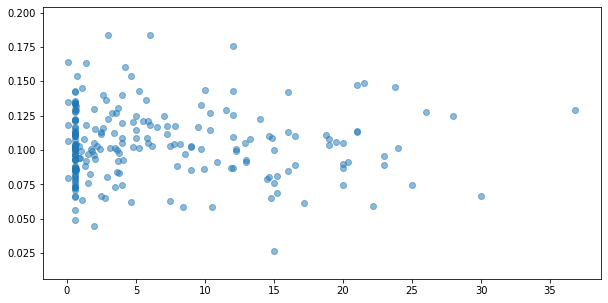

In [108]:
plt.figure(figsize = (10,5))
plt.scatter(x=df['salary'], y=df['pct'], alpha=0.5)
plt.show()

In [26]:
dfBunts = pd.read_sql_query("""
SELECT gameKey, 
CASE    WHEN atBatOutcome IN ('RO', 'R', 'ROO') THEN 1
        WHEN atBatOutcome IN ('RR', 'RRO') THEN 2
        WHEN atBatOutcome = 'RRR' THEN 3
        WHEN atBatOutcome = 'RRRR' THEN 4
        ELSE 0
        END AS runs, wWPA, wWE, playDescription
FROM "gamelogs.playbyplay"
--WHERE year = 2014
WHERE playDescription LIKE '%Bunt%' 
	OR playDescription LIKE '%bunt%'
; """, conn)

In [27]:
dfBunts

,gameKey,runs,wWPA,wWE,playDescription
0,20000329NYMCHC0,0,2,54,Bunt Groundout: C-1B/Sacrifice; Ordonez to 2B
1,20000329NYMCHC0,0,-2,68,Bunt Groundout: 1B unassisted/Sacrifice; Girar...
2,20000330CHCNYM0,0,0,61,Bunt Groundout: 3B-1B/Sacrifice; Zeile to 3B; ...
3,20000330CHCNYM0,0,-13,40,Reached on E3 (throw)/Sacrifice Bunt; Girardi ...
4,20000330CHCNYM0,0,1,30,Bunt Groundout: C-1B/Sacrifice; Brock to 2B
...,...,...,...,...,...
58134,20190929PHIMIA0,0,-5,81,Single to 3B/Bunt (Bunt to Short 3B Line)
58135,20190929PITCIN0,0,-2,63,Bunt Groundout: 1B-2B/Sacrifice (Short 1B Line...
58136,20190929STLCHC0,0,0,98,Strikeout (foul bunt)
58137,20190929TORTBR0,0,3,72,Single to P (Bunt to Weak 2B)


In [28]:
dfBunts[['runs', 'wWPA','wWE']].mean()

runs     0.034744
wWPA     0.370801
wWE     62.799481
dtype: float64

In [24]:
dfBunts[dfBunts['playDescription']=='Bunt Groundout: 1B unassisted/Sacrifice (Weak 2B-1B); Escobar to 3B']

,gameKey,runs,wWPA,wWE,playDescription
47157,20150406KCRCHW0,0,-1,72,Bunt Groundout: 1B unassisted/Sacrifice (Weak ...
